In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [29]:
df = pd.read_csv("water-quality-nooutliers.csv")

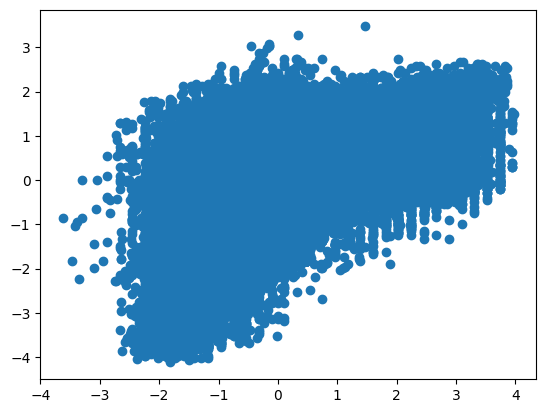

correlation matrix is 
 [[1.         0.41170986]
 [0.41170986 1.        ]]


In [30]:
#correlation matrix
x=df.iloc[:,0]
y=df.iloc[:,1]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
plt.show()
print("correlation matrix is \n",np.corrcoef([x,y]))

In [31]:
pca_columns = ['Temperature', 'pH', 'DO', 'Conductivity', 'Total_N', 'Total_P']
X = df[pca_columns]

In [32]:
#standardise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Mean of each feature: {X_scaled.mean(axis=0).round(6)}")
print(f"Std of each feature: {X_scaled.std(axis=0).round(6)}") #confirms

Mean of each feature: [ 0. -0. -0.  0.  0.  0.]
Std of each feature: [1. 1. 1. 1. 1. 1.]


In [33]:
pca = PCA() #keep all components

pca.fit(X_scaled)

print(f"Number of components: {pca.n_components_}")
print(f"Shape of components: {pca.components_.shape}")

Number of components: 6
Shape of components: (6, 6)


In [37]:
X_pca = pca.transform(X_scaled)

components = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=components)

print("Transformed data shape:", X_pca_df.shape)
print("\nPrincipal Components (first 5 rows):")
print(X_pca_df.head())
#the first column of this new matrix corresponds to PC1 and explains the majority of the variation

X_pca_df['Year'] = df['Year'].values
X_pca_df['Month'] = df['Month'].values
X_pca_df['Season'] = df['Season'].values

Transformed data shape: (138981, 6)

Principal Components (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6
0  1.937563  0.050463  0.241164  0.008441 -0.393618 -0.086039
1  1.508225 -0.409134  0.262990  0.173643  0.452080  0.444610
2  1.851106  0.534554  0.408445  0.367475  0.407471 -0.250858
3  1.162705 -0.290642  0.181315  0.386334  0.902070 -0.288004
4  1.248780  0.220108  0.093634 -0.014993 -0.226012 -0.397753


In [46]:
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=components,
    index=pca_columns
)

print(loadings_df)

                   PC1       PC2       PC3       PC4       PC5       PC6
Temperature   0.655437 -0.068018  0.335469  0.172603  0.325005 -0.563752
pH            0.447691  0.590197  0.254779  0.065728 -0.005167  0.618046
DO           -0.205688  0.733717  0.008500 -0.109290 -0.329982 -0.546303
Conductivity  0.026591 -0.233217  0.608843 -0.681566 -0.330439  0.022182
Total_N      -0.503842  0.193664  0.402626 -0.081290  0.734228  0.028836
Total_P      -0.270378 -0.129632  0.538218  0.694841 -0.370374  0.020780


In [49]:
output_path = "PCA_transformed_dataset.csv"
df.to_csv(output_path, index=False)